In [378]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

import helper_functions as hf

## Clean and normalize the dataset

As we are dealing with a real dataset, we have to clean it up first.
There are some **NA values**, which we have to deal with. Currently, *backward filling* method is implemented.

Secondly, **some values are wrong** in the csv file or they get imported wrongly. Therefore, *filtering of the values* is performed, so that the values stay within the expected interval. That is done by getting rid of values above the 0.99 quantile and lower than 0.01 quantile.

Normalizing is also an important part of preprocessing the data, to exclude

At the end we get a pandas DataFrame object to work with.

            radiation  production
date                             
2011-01-01       42.8       661.0
2011-01-02       12.3        74.0
2011-01-03       37.8       754.0
2011-01-04       27.2       159.0
2011-01-05       41.3       706.0
...               ...         ...
2022-11-09       11.2       121.0
2022-11-10       20.8       323.0
2022-11-11       59.6      1111.0
2022-11-12       61.3      1242.0
2022-11-13       62.1      1111.0

[4337 rows x 2 columns]
            radiation  production
date                             
2011-01-01   0.115396    0.114740
2011-01-02   0.028920    0.012225
2011-01-03   0.101219    0.130981
2011-01-04   0.071165    0.027070
2011-01-05   0.111143    0.122599
...               ...         ...
2022-11-09   0.025801    0.020433
2022-11-10   0.053020    0.055711
2022-11-11   0.163028    0.193329
2022-11-12   0.167848    0.216207
2022-11-13   0.170116    0.193329

[4337 rows x 2 columns]


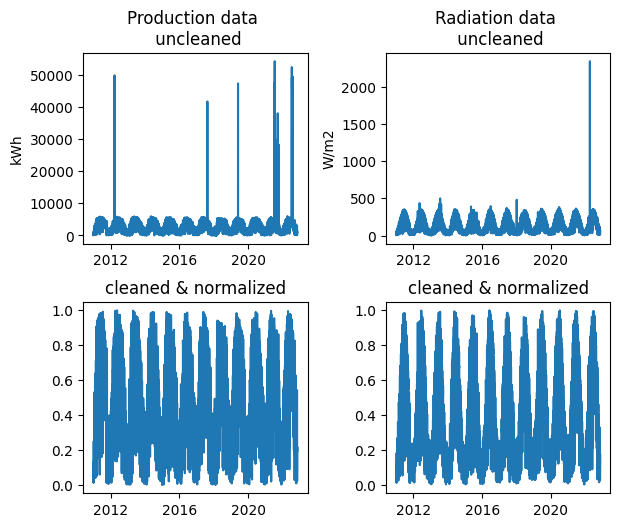

In [44]:
# import and clean data
importlib.reload(hf)

fig, ax = plt.subplots(2, 2, figsize=(6, 5))
fig.tight_layout()
ax = ax.flatten()

data = hf.import_data("data/data.csv")

ax[0].plot(data["production"])
ax[0].set(title="Production data \n uncleaned", ylabel="kWh")
ax[0].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])
ax[1].plot(data["radiation"])
ax[1].set(title="Radiation data \n uncleaned", ylabel="W/m2")
ax[1].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])

cleaned_data = hf.clean_data(data)
print(cleaned_data)

normalized_data, scaler_prod, scaler_rad = hf.normalize_data(cleaned_data)
print(normalized_data)

ax[2].plot(normalized_data["production"])
#ax[2].set(title="Production data cleaned & normalized", ylabel="kWh")
ax[2].set(title="cleaned & normalized")
ax[2].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])
ax[3].plot(normalized_data["radiation"])
#ax[3].set(title="Radiation data cleaned & normalized", ylabel="W/m2")
ax[3].set(title="cleaned & normalized")
ax[3].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])

plt.subplots_adjust(wspace=0.35, hspace=0.3)
fig.savefig("img/clean_normalize.png", bbox_inches='tight')
plt.show()

            radiation  production
date                             
2011-01-01       42.8       661.0
2011-01-02       12.3        74.0
2011-01-03       37.8       754.0
2011-01-04       27.2       159.0
2011-01-05       41.3       706.0
...               ...         ...
2022-11-09       11.2       121.0
2022-11-10       20.8       323.0
2022-11-11       59.6      1111.0
2022-11-12       61.3      1242.0
2022-11-13       62.1      1111.0

[4337 rows x 2 columns]
            radiation  production
date                             
2011-01-01   0.115396    0.114740
2011-01-02   0.028920    0.012225
2011-01-03   0.101219    0.130981
2011-01-04   0.071165    0.027070
2011-01-05   0.111143    0.122599
...               ...         ...
2022-11-09   0.025801    0.020433
2022-11-10   0.053020    0.055711
2022-11-11   0.163028    0.193329
2022-11-12   0.167848    0.216207
2022-11-13   0.170116    0.193329

[4337 rows x 2 columns]


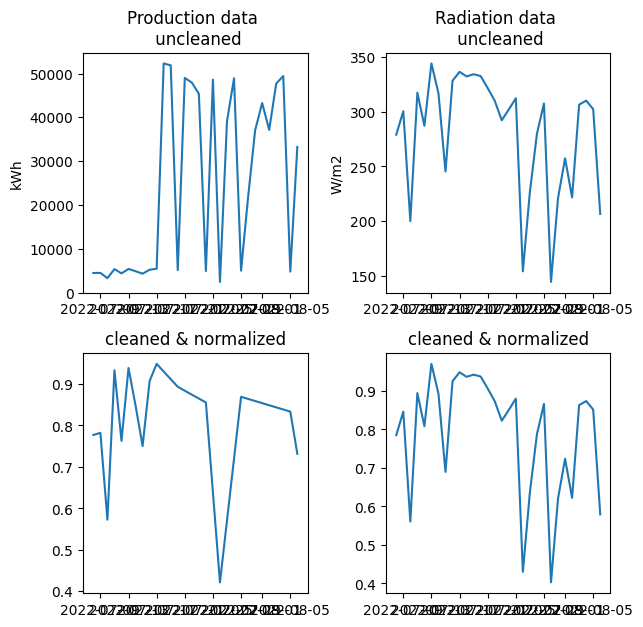

In [45]:
# import and clean data
importlib.reload(hf)

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
fig.tight_layout()
ax = ax.flatten()

data = hf.import_data("data/data.csv")

ax[0].plot(data["production"][-130:-100])
ax[0].set(title="Production data \n uncleaned", ylabel="kWh")
#ax[0].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])
ax[1].plot(data["radiation"][-130:-100])
ax[1].set(title="Radiation data \n uncleaned", ylabel="W/m2")
#ax[1].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])

cleaned_data = hf.clean_data(data)
print(cleaned_data)

normalized_data, scaler_prod, scaler_rad = hf.normalize_data(cleaned_data)
print(normalized_data)

ax[2].plot(normalized_data["production"][-130:-100])
#ax[2].set(title="Production data cleaned & normalized", ylabel="kWh")
ax[2].set(title="cleaned & normalized")
#ax[2].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])
ax[3].plot(normalized_data["radiation"][-130:-100])
#ax[3].set(title="Radiation data cleaned & normalized", ylabel="W/m2")
ax[3].set(title="cleaned & normalized")
#ax[3].set_xticks([pd.to_datetime('2012'), pd.to_datetime('2016'), pd.to_datetime('2020')], ["2012", "2016", "2020"])

plt.subplots_adjust(wspace=0.35, hspace=0.25)
fig.savefig("img/clean_normalize_month.png", bbox_inches='tight')
plt.show()

### Cyclical representation of date

In [46]:
importlib.reload(hf)

normalized_data = hf.cyclical_date(normalized_data)

normalized_data

,radiation,production,day,day_sin,day_cos
date,,,,,
2011-01-01,0.115396,0.114740,1,0.000000,1.000000
2011-01-02,0.028920,0.012225,2,0.017213,0.999852
2011-01-03,0.101219,0.130981,3,0.034422,0.999407
2011-01-04,0.071165,0.027070,4,0.051620,0.998667
2011-01-05,0.111143,0.122599,5,0.068802,0.997630
...,...,...,...,...,...
2022-11-09,0.025801,0.020433,313,-0.790946,0.611886
2022-11-10,0.053020,0.055711,314,-0.780296,0.625411
2022-11-11,0.163028,0.193329,315,-0.769415,0.638749


## Other data analysis

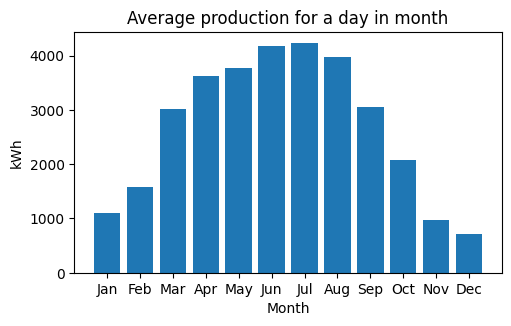

In [362]:
# plot average monthly production of normalized data as bar chart and change y axis back to kWh

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
fig.tight_layout()

monthly_production = normalized_data["production"].groupby(normalized_data.index.month).mean()
monthly_production = monthly_production * (scaler_prod.data_max_ - scaler_prod.data_min_) + scaler_prod.data_min_
ax.bar(monthly_production.index, monthly_production)
ax.set(title="Average production for a day in month", xlabel="Month", ylabel="kWh")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
fig.savefig("img/monthly_production.png", bbox_inches='tight', dpi=300)
plt.show()


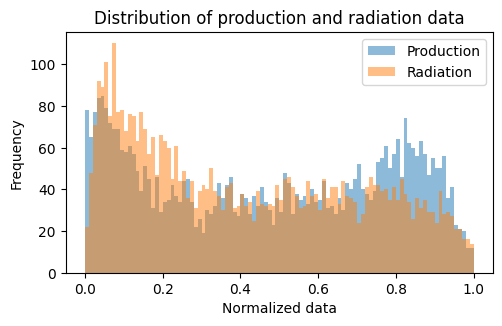

In [361]:
# plot distribution of production data and radiation data on the same plot

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
fig.tight_layout()

ax.hist(normalized_data["production"], bins=100, alpha=0.5, label="Production")
ax.hist(normalized_data["radiation"], bins=100, alpha=0.5, label="Radiation")
ax.set(title="Distribution of production and radiation data", xlabel="Normalized data", ylabel="Frequency")
ax.legend()
fig.savefig("img/distribution.png", bbox_inches='tight', dpi=300)
plt.show()

            radiation  production       day   day_sin   day_cos
radiation    1.000000    0.945235 -0.104561  0.139704 -0.786939
production   0.945235    1.000000 -0.117768  0.134483 -0.697999
day         -0.104561   -0.117768  1.000000 -0.781966 -0.027348
day_sin      0.139704    0.134483 -0.781966  1.000000  0.007950
day_cos     -0.786939   -0.697999 -0.027348  0.007950  1.000000


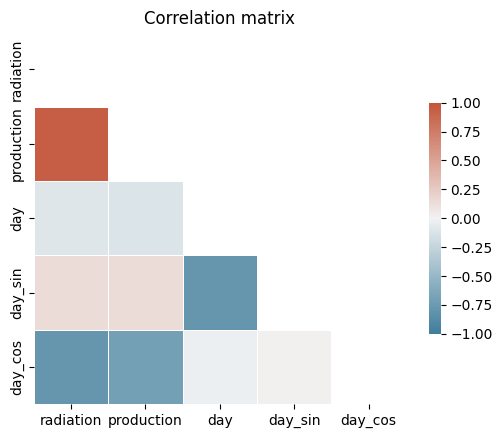

In [389]:
# create correlation matrix plot

'''fig, ax = plt.subplots(1, 1, figsize=(5, 3))
fig.tight_layout()'''

corr = normalized_data.corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with scale from 0 to 1

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# set title
plt.title("Correlation matrix")

# set figure size
plt.gcf().set_size_inches(6, 6)

# save figure
plt.savefig("img/correlation.png", bbox_inches='tight', dpi=300)

## Comparison model

Here is implemented a simple model to do comparison with any further modelling we will be doing. Since we can see that the attribute of solar radiation is heavily correlated to the production, we can calculate average coefficient, with which we need to multiply radiation value to get production value.


 RMSE: 995.3826190473654
date
2021-01-31    0.166958
2021-02-01    0.176788
2021-02-02    0.142882
2021-02-03    0.140238
2021-02-04    0.146225
                ...   
2022-11-08    0.230702
2022-11-09    0.212065
2022-11-10    0.228107
2022-11-11    0.229505
2022-11-12    0.224465
Name: production, Length: 651, dtype: float64

 RMSE: 1124.94880859885


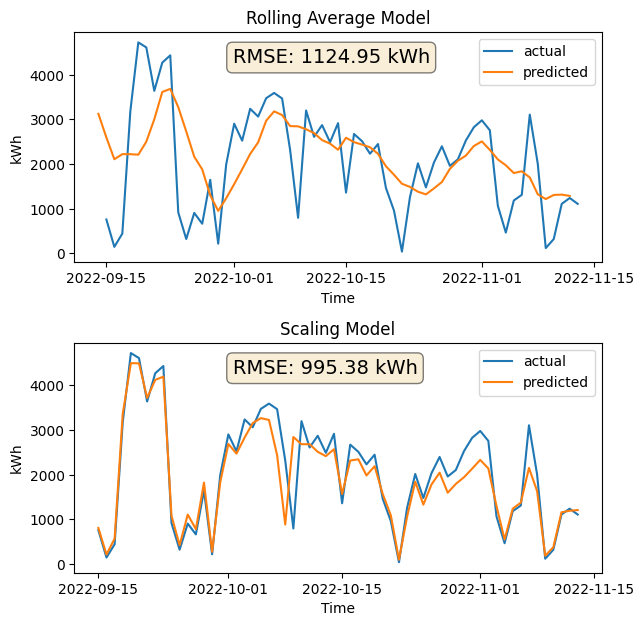

In [363]:
importlib.reload(hf)

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()

# divide into test & train data
train_p = 0.85
test_p = 0.15
train_data, test_data, valid_data = hf.divide_data(train_p, test_p, 0.0, normalized_data)

train_data = train_data[~(train_data['radiation'] <= 0.0)]
train_data.fillna(method="bfill", inplace=True)

radiation_output_coeff = (np.array(train_data["production"], dtype=np.float32) /
                          np.array(train_data["radiation"], dtype=np.float32)).mean()
predicted_data = test_data["radiation"] * radiation_output_coeff

predicted_data_scaledback = scaler_prod.inverse_transform(predicted_data.values.reshape(-1, 1)).flatten()
predicted_data_scaledback = pd.DataFrame(predicted_data_scaledback, index=predicted_data.index)

test_data_scaledback = scaler_prod.inverse_transform(test_data["production"].values.reshape(-1, 1)).flatten()
test_data_scaledback = pd.DataFrame(test_data_scaledback, index=test_data.index)

rmse = mean_squared_error(test_data_scaledback, predicted_data_scaledback, squared=False)
print("\n RMSE:", rmse)
#print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())


ax[1].plot(test_data_scaledback[-60:], label="actual")
ax[1].plot(predicted_data_scaledback[-60:], label="predicted")
ax[1].set(title="Scaling Model", xlabel="Time", ylabel="kWh")
ax[1].legend()

ax[1].text(0.3, -0.42, "RMSE: " + str(round(rmse, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# add last 7 days of train_data to test_data
test_data_extra = pd.concat([train_data[-7:], test_data])

# do a comparison model where we use the average production of the last 7 days to predict the next day

predicted_data = test_data_extra["production"].rolling(7).mean()
predicted_data = predicted_data.shift(-1)

# remove first 7 days of predicted data
predicted_data = predicted_data[6:-1]
print(predicted_data)


predicted_data_scaledback = scaler_prod.inverse_transform(predicted_data.values.reshape(-1, 1)).flatten()
predicted_data_scaledback = pd.DataFrame(predicted_data_scaledback, index=predicted_data.index)

test_data_scaledback = scaler_prod.inverse_transform(test_data["production"].values.reshape(-1, 1)).flatten()
test_data_scaledback = pd.DataFrame(test_data_scaledback, index=test_data.index)

#remove NaN values
predicted_data_scaledback = predicted_data_scaledback[~predicted_data_scaledback.isna()]
test_data_scaledback = test_data_scaledback[~test_data_scaledback.isna()]

rmse = mean_squared_error(test_data_scaledback, predicted_data_scaledback, squared=False)
print("\n RMSE:", rmse)
#print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())


ax[0].plot(test_data_scaledback[-60:], label="actual")
ax[0].plot(predicted_data_scaledback[-60:], label="predicted")
ax[0].set(title="Rolling Average Model", xlabel="Time", ylabel="kWh")
ax[0].legend()

ax[0].text(0.3, 0.93, "RMSE: " + str(round(rmse, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.subplots_adjust(hspace=0.35)
ax[0].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())

fig.savefig("img/comparison_models.png", bbox_inches='tight', dpi=300)
plt.show()


 RMSE: 995.3826190473654
                      0
date                   
2021-04-06  2541.838394
2021-04-07  1733.506481
2021-04-26  3475.695911
2021-04-27  4723.824751
2021-06-03  1509.515505
...                 ...
2022-09-01  3158.865000
2022-09-07  3616.592709
2022-09-09  2687.240923
2022-09-11  1689.604239
2022-10-09  2048.494951

[61 rows x 1 columns]


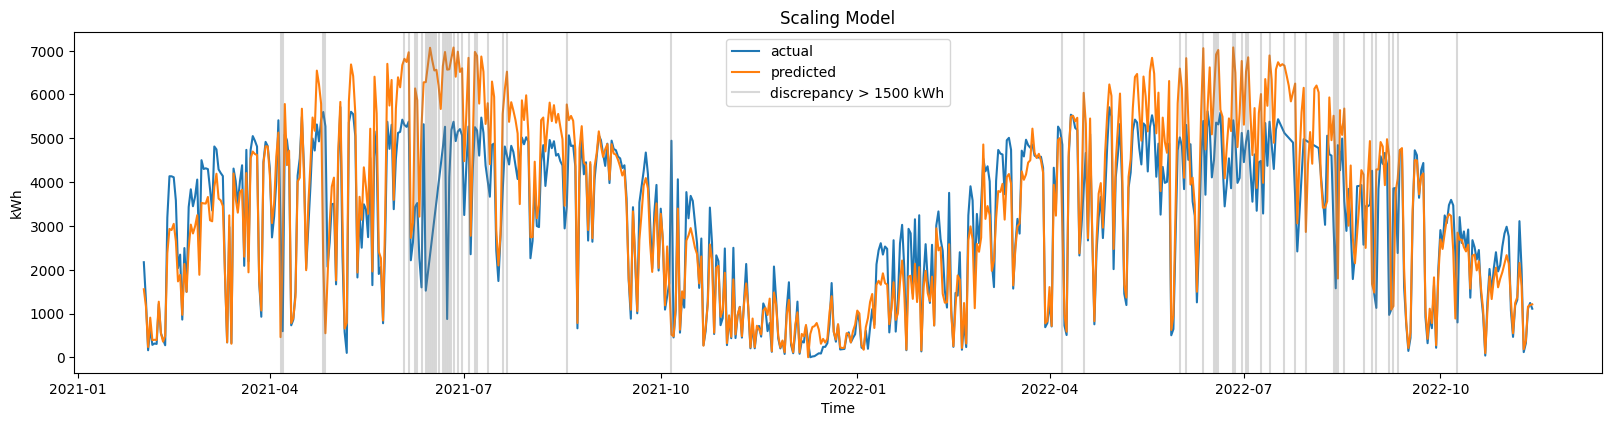

In [169]:
importlib.reload(hf)

fig, ax = plt.subplots(1, 1, figsize=(16, 4))
fig.tight_layout()

# divide into test & train data
train_p = 0.85
test_p = 0.15
train_data, test_data, valid_data = hf.divide_data(train_p, test_p, 0.0, normalized_data)

train_data = train_data[~(train_data['radiation'] <= 0.0)]
train_data.fillna(method="bfill", inplace=True)

radiation_output_coeff = (np.array(train_data["production"], dtype=np.float32) /
                          np.array(train_data["radiation"], dtype=np.float32)).mean()
predicted_data = test_data["radiation"] * radiation_output_coeff

predicted_data_scaledback = scaler_prod.inverse_transform(predicted_data.values.reshape(-1, 1)).flatten()
predicted_data_scaledback = pd.DataFrame(predicted_data_scaledback, index=predicted_data.index)

test_data_scaledback = scaler_prod.inverse_transform(test_data["production"].values.reshape(-1, 1)).flatten()
test_data_scaledback = pd.DataFrame(test_data_scaledback, index=test_data.index)

rmse = mean_squared_error(test_data_scaledback, predicted_data_scaledback, squared=False)
print("\n RMSE:", rmse)
#print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())


ax.plot(test_data_scaledback, label="actual")
ax.plot(predicted_data_scaledback, label="predicted")
ax.set(title="Scaling Model", xlabel="Time", ylabel="kWh")
ax.legend()

# add vertical lines at high discrepancy between actual and predicted
discrepancy = abs(test_data_scaledback - predicted_data_scaledback)
discrepancy = discrepancy[discrepancy > 1500]
discrepancy = discrepancy.dropna()
print(discrepancy)
for i in discrepancy.index:
    ax.axvline(x=i, color="gray", alpha=0.3)

# add discrepancy label to legend
ax.legend(["actual", "predicted", "discrepancy > 1500 kWh"])

fig.savefig("img/scale_model_all_data.png", bbox_inches='tight')
plt.show()

In [79]:
# add last 7 days of train_data to test_data
test_data_extra = pd.concat([train_data[-7:], test_data])

# do a comparison model where we use the average production of the last 7 days to predict the next day

predicted_data = test_data_extra["production"].rolling(7).mean()
predicted_data = predicted_data.shift(-1)

# remove first 7 days of predicted data
predicted_data = predicted_data[6:-1]
print(predicted_data)


predicted_data_scaledback = scaler_prod.inverse_transform(predicted_data.values.reshape(-1, 1)).flatten()
predicted_data_scaledback = pd.DataFrame(predicted_data_scaledback, index=predicted_data.index)

test_data_scaledback = scaler_prod.inverse_transform(test_data["production"].values.reshape(-1, 1)).flatten()
test_data_scaledback = pd.DataFrame(test_data_scaledback, index=test_data.index)

#remove NaN values
predicted_data_scaledback = predicted_data_scaledback[~predicted_data_scaledback.isna()]
test_data_scaledback = test_data_scaledback[~test_data_scaledback.isna()]

rmse = mean_squared_error(test_data_scaledback, predicted_data_scaledback, squared=False)
print("\n RMSE:", rmse)
#print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())


ax[0].plot(test_data_scaledback[-30:], label="actual")
ax[0].plot(predicted_data_scaledback[-30:], label="predicted")
ax[0].set(title="Rolling Average Model", xlabel="Time", ylabel="kWh")
fig.savefig("img/comparison_model.png", bbox_inches='tight')
ax[0].legend()
plt.show()

date
2021-01-31    0.166958
2021-02-01    0.176788
2021-02-02    0.142882
2021-02-03    0.140238
2021-02-04    0.146225
                ...   
2022-11-08    0.230702
2022-11-09    0.212065
2022-11-10    0.228107
2022-11-11    0.229505
2022-11-12    0.224465
Name: production, Length: 651, dtype: float64

 RMSE: 1124.94880859885


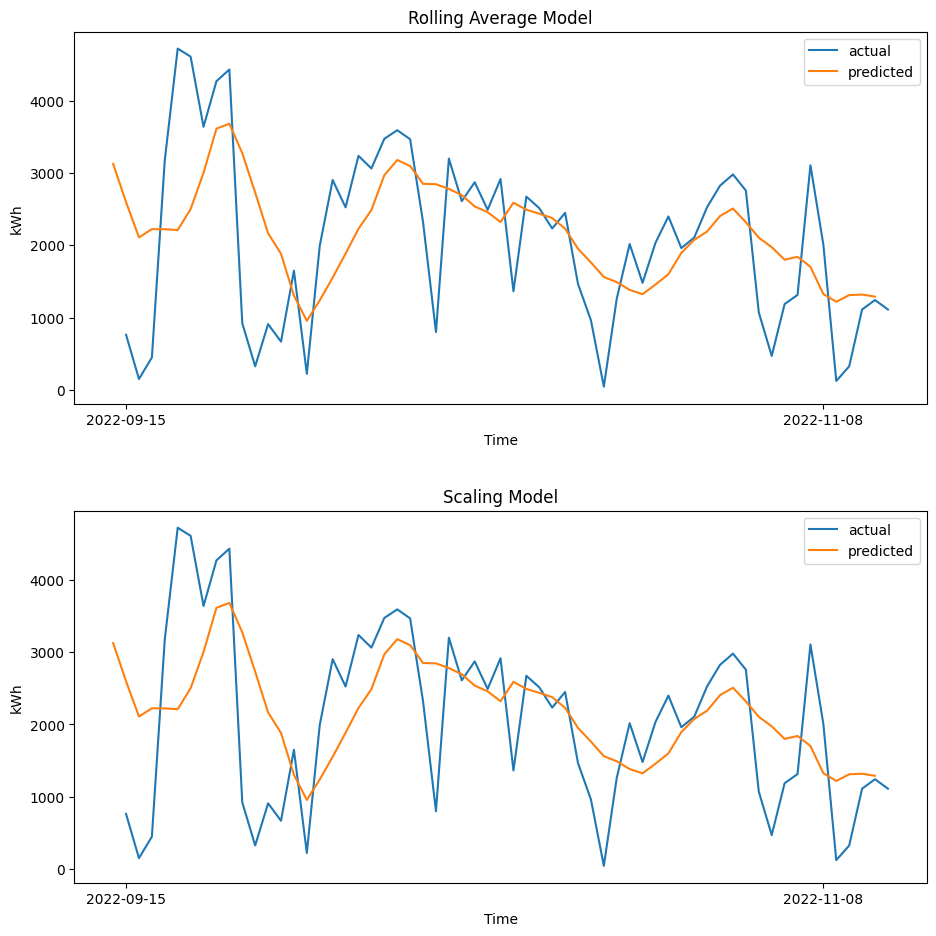

In [131]:
# make figure with last two plots and set xticks to be every 3 days
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(test_data_scaledback[-60:], label="actual")
ax[0].plot(predicted_data_scaledback[-60:], label="predicted")
ax[0].set(title="Rolling Average Model", xlabel="Time", ylabel="kWh")
ax[0].legend()

ax[1].plot(test_data_scaledback[-60:], label="actual")
ax[1].plot(predicted_data_scaledback[-60:], label="predicted")
ax[1].set(title="Scaling Model", xlabel="Time", ylabel="kWh")
ax[1].legend()

# set xticks to be every 7 days
ax[0].set_xticks(ax[0].get_xticks()[::7])
ax[1].set_xticks(ax[1].get_xticks()[::7])

# set horizontal padding between subplots
fig.subplots_adjust(hspace=0.5)
fig.tight_layout(pad=3.0)


fig.savefig("img/comparison_model.png", bbox_inches='tight')
plt.show()


## LINEAR REGRESSION

Firstly, let's see if linear regression does the trick.

                   0
date                
2021-02-01  0.273807
2021-02-02  0.217046
2021-02-03  0.084123
2021-02-04  0.180557
2021-02-05  0.106711
...              ...
2022-11-09  0.076883
2022-11-10  0.104684
2022-11-11  0.217046
2022-11-12  0.221969
2022-11-13  0.224286

[651 rows x 1 columns]

 RMSE: 0.14239014189245625
mean error:  [819.32595248]


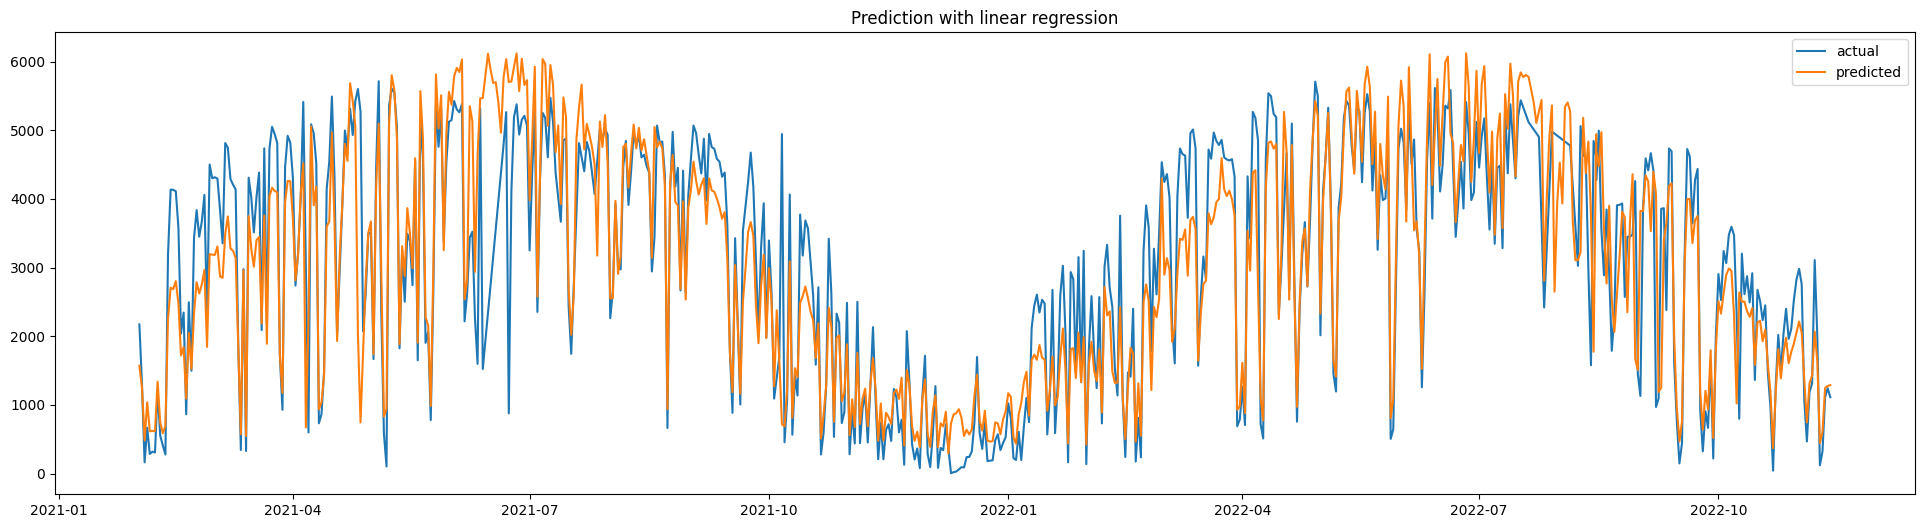

In [139]:
importlib.reload(hf)

X = np.array(train_data["radiation"]).reshape((-1, 1))
y = np.array(train_data["production"])
model = hf.build_lin_reg_model(X, y)

X_test = np.array(test_data["radiation"]).reshape(-1, 1)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)
print(df_pred)

last_month_true = test_data
#last_month_true = test_data[-30:]
last_month_pred = df_pred
#last_month_pred = df_pred[-30:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

plt.figure(figsize=(24, 6))
plt.title("Prediction with linear regression")
plt.plot(last_month_true_scaledback, label="actual")
plt.plot(last_month_pred_scaledback, label="predicted")
plt.legend()
plt.savefig("img/lin_reg.png", bbox_inches='tight')
plt.show()


 RMSE: 0.1408040239971118
mean error:  [810.24384141]


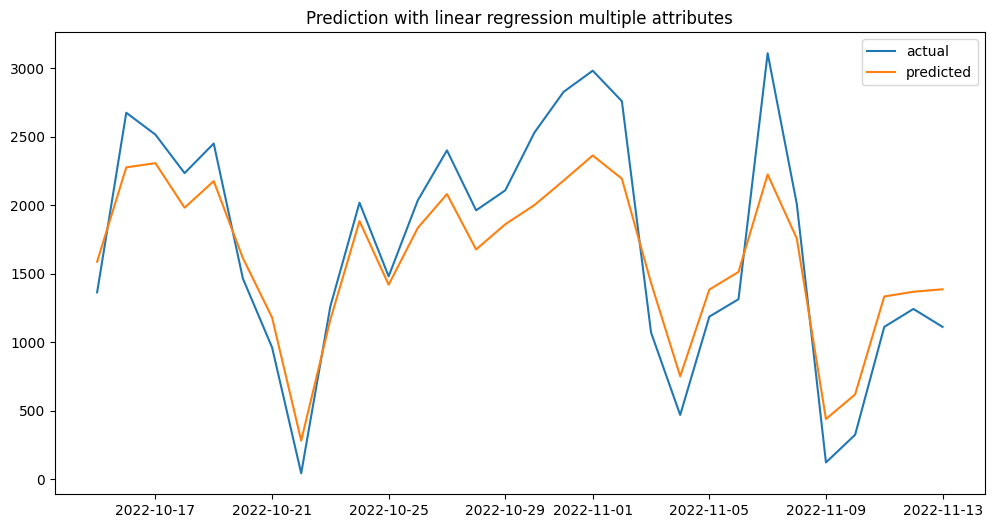

In [51]:
importlib.reload(hf)

X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_lin_reg_model(X, y)

X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-30:]
last_month_pred = df_pred[-30:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

plt.figure(figsize=(12, 6))
plt.title("Prediction with linear regression using multiple attributes")
plt.plot(last_month_true_scaledback, label="actual")
plt.plot(last_month_pred_scaledback, label="predicted")
plt.legend()
plt.show()

                   0
date                
2021-02-01  0.273807
2021-02-02  0.217046
2021-02-03  0.084123
2021-02-04  0.180557
2021-02-05  0.106711
...              ...
2022-11-09  0.076883
2022-11-10  0.104684
2022-11-11  0.217046
2022-11-12  0.221969
2022-11-13  0.224286

[651 rows x 1 columns]

 RMSE: 0.14239014189245625
mean error:  819.3259524762045

 RMSE: 0.1408040239971118
mean error:  810.2438414074622


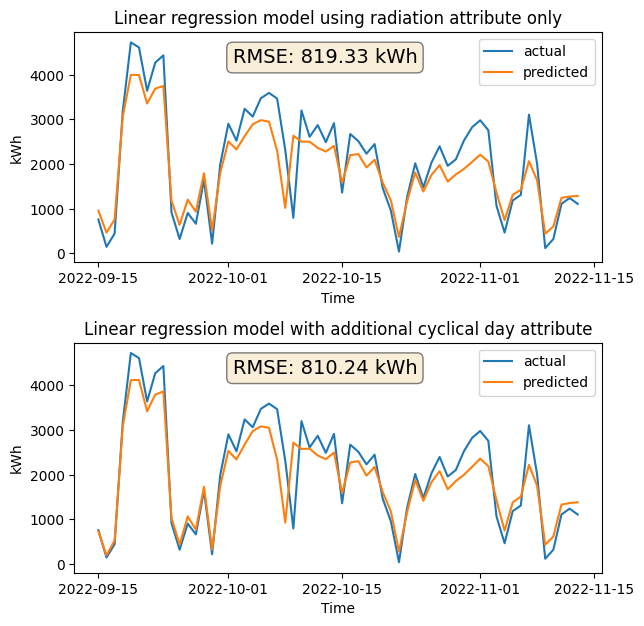

In [364]:
importlib.reload(hf)

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()

X = np.array(train_data["radiation"]).reshape((-1, 1))
y = np.array(train_data["production"])
model = hf.build_lin_reg_model(X, y)

X_test = np.array(test_data["radiation"]).reshape(-1, 1)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)
print(df_pred)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)


ax[0].plot(last_month_true_scaledback, label="actual")
ax[0].plot(last_month_pred_scaledback, label="predicted")
ax[0].set(title="Linear regression model using radiation attribute only", xlabel="Time", ylabel="kWh")
ax[0].legend()

ax[0].text(0.3, 0.93, "RMSE: " + str(round(mean_err, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.subplots_adjust(hspace=0.35)
ax[0].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())


# multile attributes

X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_lin_reg_model(X, y)

X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

ax[1].plot(last_month_true_scaledback, label="actual")
ax[1].plot(last_month_pred_scaledback, label="predicted")
ax[1].set(title="Linear regression model with additional cyclical day attribute", xlabel="Time", ylabel="kWh")
ax[1].legend()

ax[1].text(0.3, -0.42, "RMSE: " + str(round(mean_err, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.subplots_adjust(hspace=0.35)
ax[1].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())

fig.savefig("img/lin_reg_models.png", bbox_inches='tight', dpi=300)
plt.show()

## SVM


 RMSE: 0.12450457170936179
mean error:  [716.91317761]


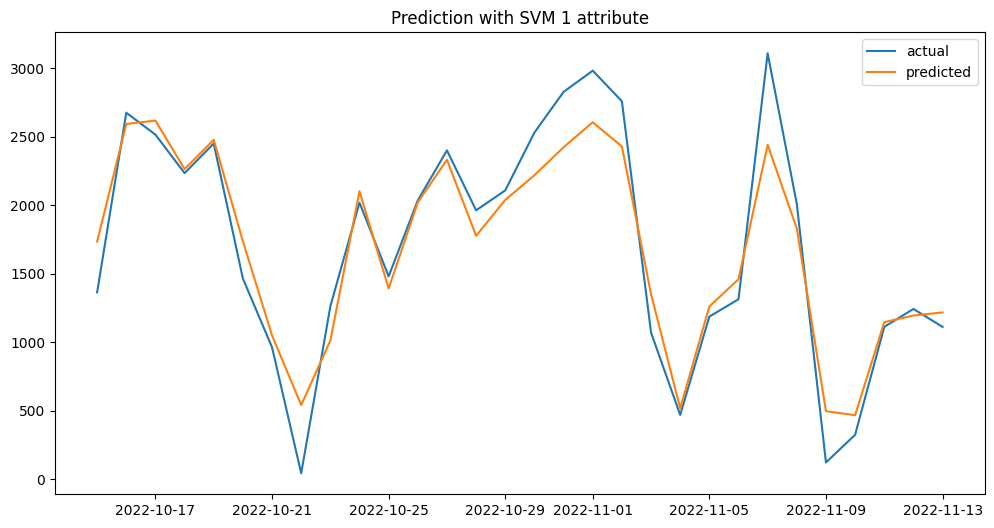

In [52]:
importlib.reload(hf)

X = np.array(train_data["radiation"]).reshape((-1, 1))
y = np.array(train_data["production"])
model = hf.build_svm_model(X, y)

X_test = np.array(test_data["radiation"]).reshape(-1, 1)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-30:]
last_month_pred = df_pred[-30:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

plt.figure(figsize=(12, 6))
plt.title("Prediction with SVM 1 attribute")
plt.plot(last_month_true_scaledback, label="actual")
plt.plot(last_month_pred_scaledback, label="predicted")
plt.legend()
plt.show()


 RMSE: 0.1176866566811394
mean error:  [677.87379616]


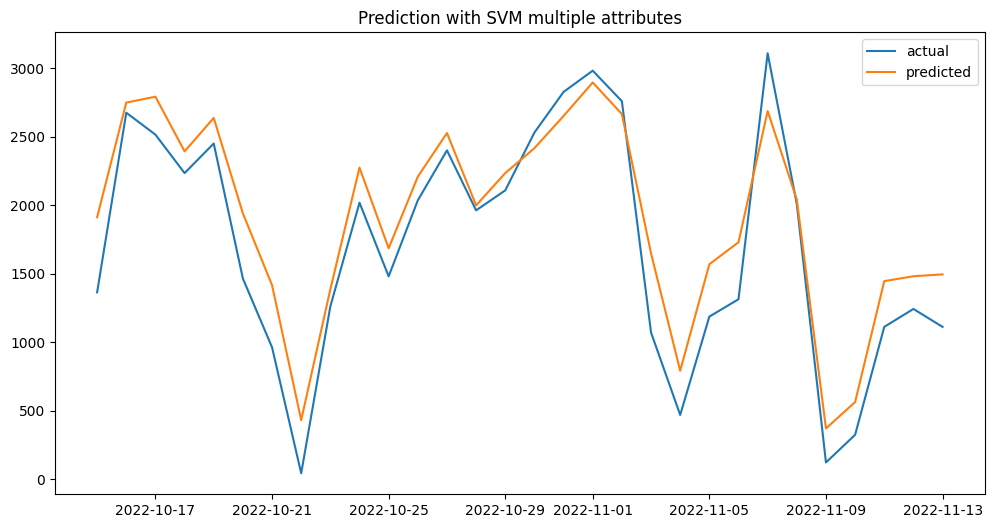

In [53]:
importlib.reload(hf)

# get multiple columns from train data


X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_svm_model(X, y)

X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-30:]
last_month_pred = df_pred[-30:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

plt.figure(figsize=(12, 6))
plt.title("Prediction with SVM multiple attributes")
plt.plot(last_month_true_scaledback, label="actual")
plt.plot(last_month_pred_scaledback, label="predicted")
plt.legend()
plt.show()


 RMSE: 0.1176866566811394
mean error:  [677.87379616]
                      0
date                   
2021-04-06  2541.838394
2021-04-07  1733.506481
2021-04-26  3475.695911
2021-04-27  4723.824751
2021-06-03  1509.515505
...                 ...
2022-09-01  3158.865000
2022-09-07  3616.592709
2022-09-09  2687.240923
2022-09-11  1689.604239
2022-10-09  2048.494951

[61 rows x 1 columns]


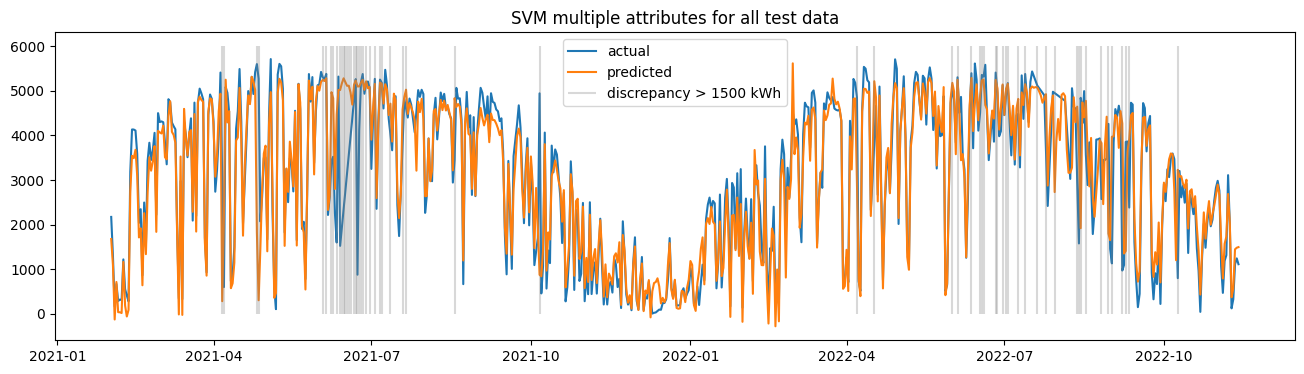

In [182]:
# full test data SVM
importlib.reload(hf)

# get multiple columns from train data


X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_svm_model(X, y)

X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data
last_month_pred = df_pred

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

plt.figure(figsize=(16, 4))
plt.title("SVM multiple attributes for all test data")
plt.plot(last_month_true_scaledback, label="actual")
plt.plot(last_month_pred_scaledback, label="predicted")

# add vertical lines at high discrepancy between actual and predicted
discrepancy = abs(test_data_scaledback - predicted_data_scaledback)
discrepancy = discrepancy[discrepancy > 1500]
discrepancy = discrepancy.dropna()
print(discrepancy)
for i in discrepancy.index:
    plt.vlines(x=i, ymin=0, ymax=6000, color="gray", alpha=0.3)

plt.legend(["actual", "predicted", "discrepancy > 1500 kWh"])

plt.savefig("img/full_test_data_svm.png", bbox_inches='tight')
plt.show()


 RMSE: 995.3826190473654
                      0
date                   
2021-04-06  2541.838394
2021-04-07  1733.506481
2021-04-26  3475.695911
2021-04-27  4723.824751
2021-06-03  1509.515505
...                 ...
2022-09-01  3158.865000
2022-09-07  3616.592709
2022-09-09  2687.240923
2022-09-11  1689.604239
2022-10-09  2048.494951

[61 rows x 1 columns]

 RMSE: 0.1176866566811394
mean error:  [677.87379616]
                      0
date                   
2021-04-06  2541.838394
2021-04-07  1733.506481
2021-04-26  3475.695911
2021-04-27  4723.824751
2021-06-03  1509.515505
...                 ...
2022-09-01  3158.865000
2022-09-07  3616.592709
2022-09-09  2687.240923
2022-09-11  1689.604239
2022-10-09  2048.494951

[61 rows x 1 columns]


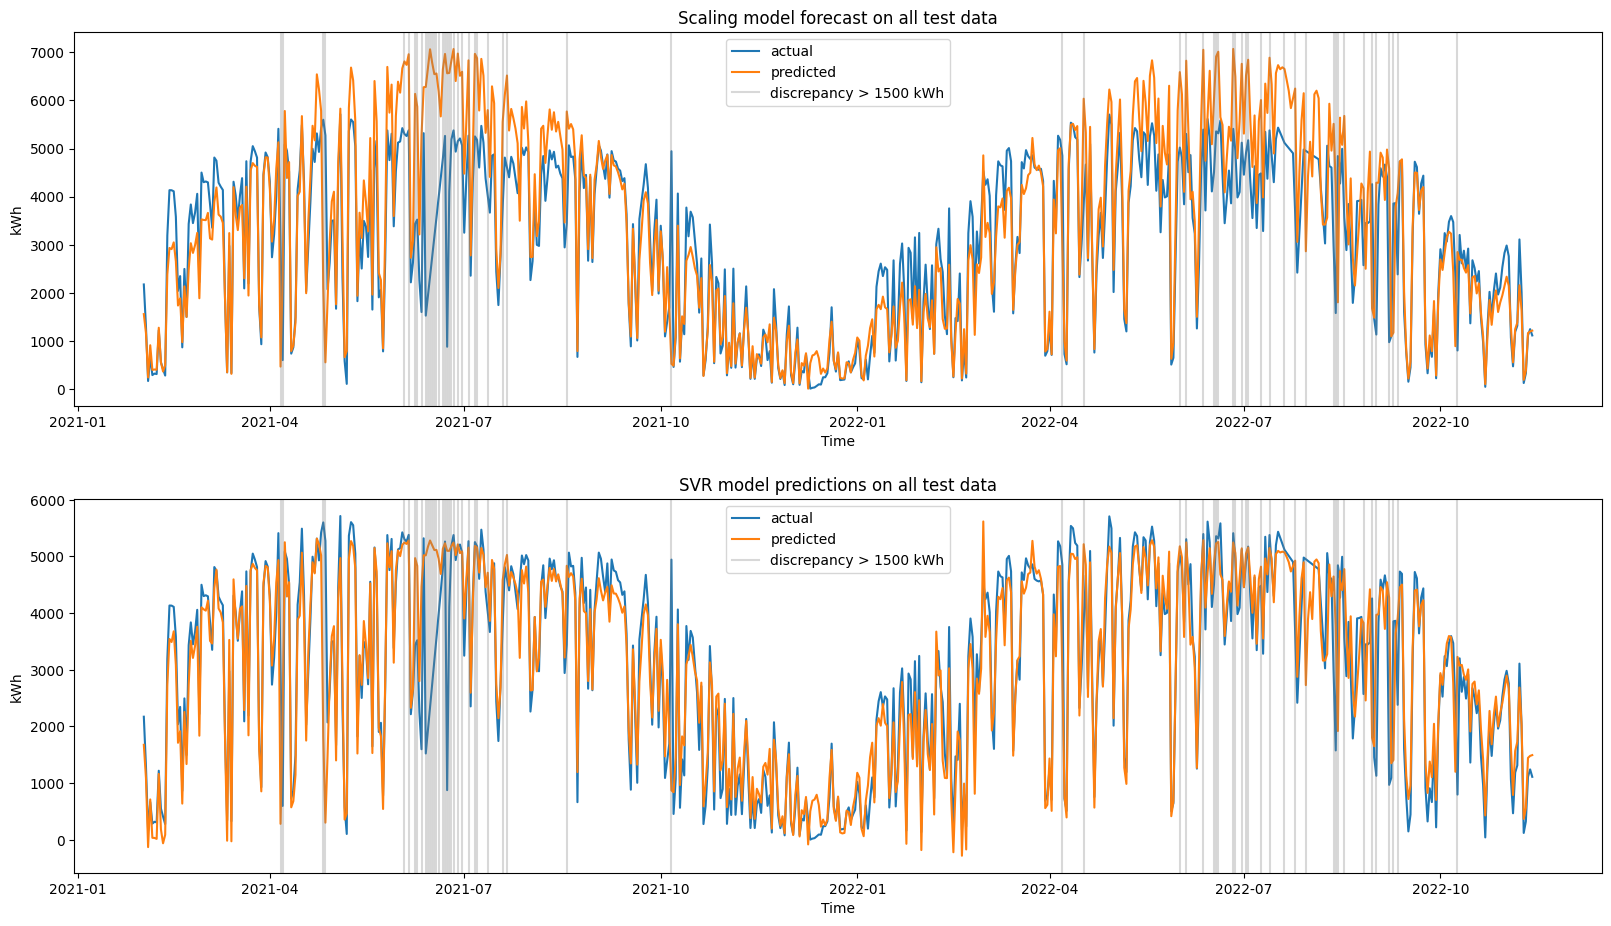

In [365]:
# same figure SVM + scaling model
importlib.reload(hf)

fig, ax = plt.subplots(2, 1, figsize=(16, 9))
fig.tight_layout()

# SCALING MODEL
radiation_output_coeff = (np.array(train_data["production"], dtype=np.float32) /
                          np.array(train_data["radiation"], dtype=np.float32)).mean()
predicted_data = test_data["radiation"] * radiation_output_coeff

predicted_data_scaledback = scaler_prod.inverse_transform(predicted_data.values.reshape(-1, 1)).flatten()
predicted_data_scaledback = pd.DataFrame(predicted_data_scaledback, index=predicted_data.index)

test_data_scaledback = scaler_prod.inverse_transform(test_data["production"].values.reshape(-1, 1)).flatten()
test_data_scaledback = pd.DataFrame(test_data_scaledback, index=test_data.index)

rmse = mean_squared_error(test_data_scaledback, predicted_data_scaledback, squared=False)
print("\n RMSE:", rmse)
#print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())


ax[0].plot(test_data_scaledback, label="actual")
ax[0].plot(predicted_data_scaledback, label="predicted")
ax[0].set(title="Scaling model forecast on all test data", xlabel="Time", ylabel="kWh")

# add vertical lines at high discrepancy between actual and predicted
discrepancy = abs(test_data_scaledback - predicted_data_scaledback)
discrepancy = discrepancy[discrepancy > 1500]
discrepancy = discrepancy.dropna()
print(discrepancy)
for i in discrepancy.index:
    ax[0].axvline(x=i, color="gray", alpha=0.3)

# add discrepancy label to legend
ax[0].legend(["actual", "predicted", "discrepancy > 1500 kWh"])


# SVM
X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_svm_model(X, y)

X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data
last_month_pred = df_pred

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

ax[1].plot(last_month_true_scaledback, label="actual")
ax[1].plot(last_month_pred_scaledback, label="predicted")
ax[1].set(title="SVR model predictions on all test data", xlabel="Time", ylabel="kWh")

# add vertical lines at high discrepancy between actual and predicted
discrepancy = abs(test_data_scaledback - predicted_data_scaledback)
discrepancy = discrepancy[discrepancy > 1500]
discrepancy = discrepancy.dropna()
print(discrepancy)
for i in discrepancy.index:
    ax[1].axvline(x=i, color="gray", alpha=0.3)

ax[1].legend(["actual", "predicted", "discrepancy > 1500 kWh"], loc="upper center")

# add padding to subplots
plt.subplots_adjust(hspace=0.25)
fig.savefig("img/all_test_data_comparison.png", bbox_inches='tight', dpi=300)
plt.show()


 RMSE: 0.12450457170936179
mean error:  716.9131776078056

 RMSE: 0.1176866566811394
mean error:  677.8737961562042


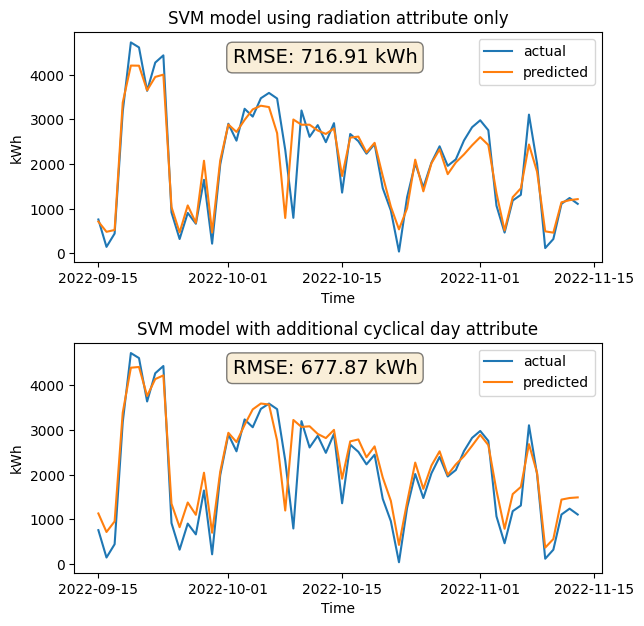

In [366]:
importlib.reload(hf)

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()

X = np.array(train_data["radiation"]).reshape((-1, 1))
y = np.array(train_data["production"])
model = hf.build_svm_model(X, y)

X_test = np.array(test_data["radiation"]).reshape(-1, 1)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

ax[0].plot(last_month_true_scaledback, label="actual")
ax[0].plot(last_month_pred_scaledback, label="predicted")
ax[0].set(title="SVM model using radiation attribute only", xlabel="Time", ylabel="kWh")
ax[0].legend()

ax[0].text(0.3, 0.93, "RMSE: " + str(round(mean_err, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.subplots_adjust(hspace=0.35)
ax[0].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())

# extra attributes

X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_svm_model(X, y)

X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

ax[1].plot(last_month_true_scaledback, label="actual")
ax[1].plot(last_month_pred_scaledback, label="predicted")
ax[1].set(title="SVM model with additional cyclical day attribute", xlabel="Time", ylabel="kWh")
ax[1].legend()

ax[1].text(0.3, -0.42, "RMSE: " + str(round(mean_err, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.subplots_adjust(hspace=0.35)
ax[1].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())

fig.savefig("img/svm_models.png", bbox_inches='tight', dpi=300)
plt.show()

## DT model


 RMSE: 0.1386310097980785
mean error:  797.8011621037975


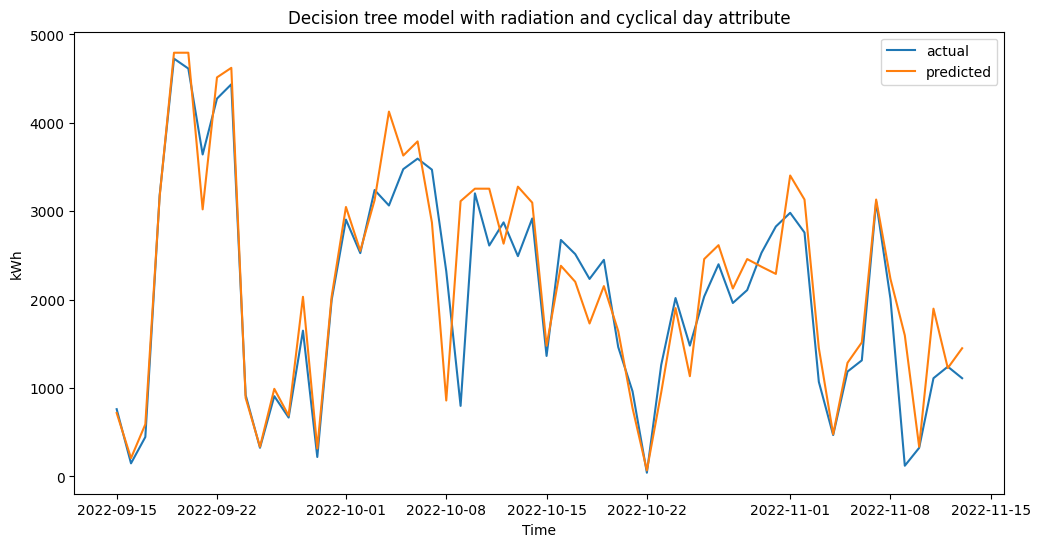

In [228]:
from sklearn.tree import plot_tree

importlib.reload(hf)

# build model
X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_dt_model(X, y)

# predict
X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

# scale back
df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

# plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(last_month_true_scaledback, label="actual")
ax.plot(last_month_pred_scaledback, label="predicted")
ax.set(title="Decision tree model with radiation and cyclical day attribute", xlabel="Time", ylabel="kWh")
ax.legend()
fig.savefig("img/dt_model.png", bbox_inches='tight')
plt.show()

## RF model


 RMSE: 0.12274208841197819
mean error:  706.8211982469871


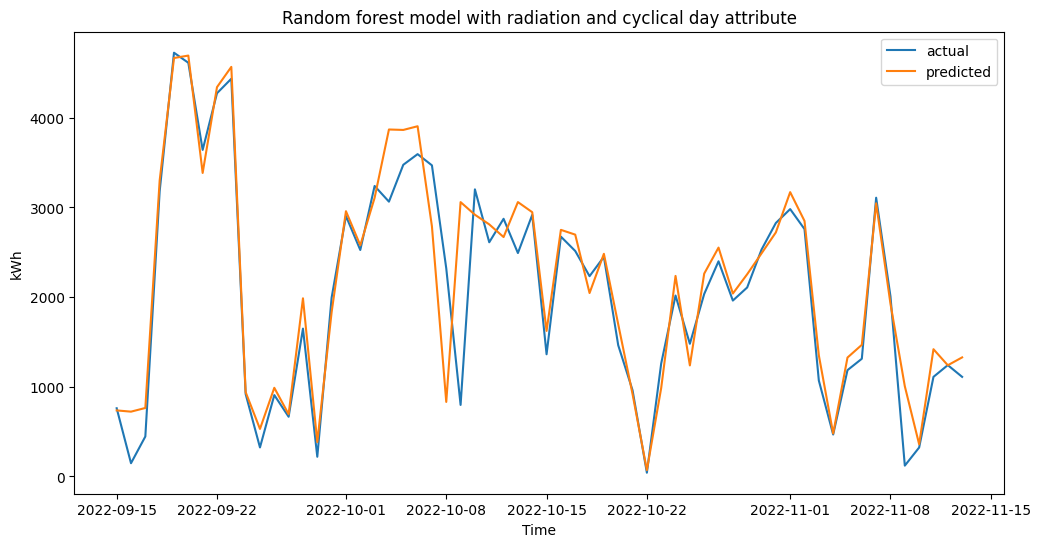

In [217]:
importlib.reload(hf)

# build model
X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_rf_model(X, y)

# predict
X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

# scale back
df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

# plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(last_month_true_scaledback, label="actual")
ax.plot(last_month_pred_scaledback, label="predicted")
ax.set(title="Random forest model with radiation and cyclical day attribute", xlabel="Time", ylabel="kWh")
ax.legend()


 RMSE: 0.13794506614150265
mean error:  793.8734487262442

 RMSE: 0.12199966486893843
mean error:  702.5700810395415


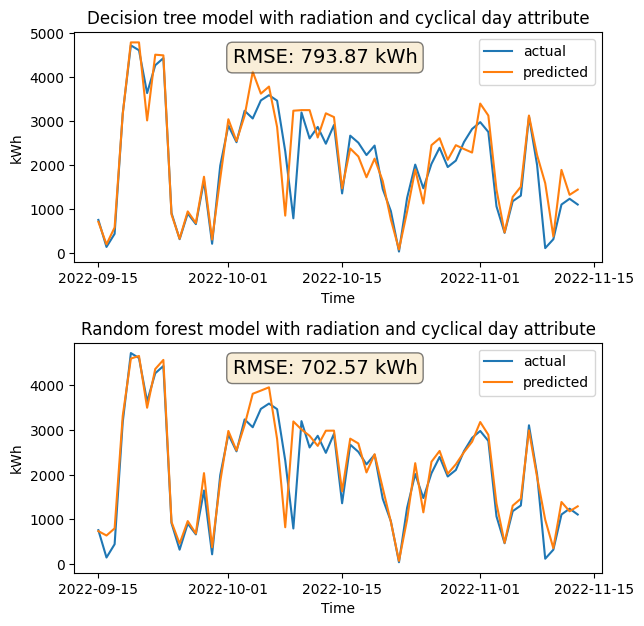

In [367]:
importlib.reload(hf)

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()

# DT

# build model
X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_dt_model(X, y)

# predict
X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

# scale back
df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

ax[0].plot(last_month_true_scaledback, label="actual")
ax[0].plot(last_month_pred_scaledback, label="predicted")
ax[0].set(title="Decision tree model with radiation and cyclical day attribute", xlabel="Time", ylabel="kWh")
ax[0].legend()

ax[0].text(0.3, 0.93, "RMSE: " + str(round(mean_err, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

######################################
# RF

# build model
X = np.array(train_data[["radiation", "day_sin", "day_cos"]].values)
y = np.array(train_data["production"])
model = hf.build_rf_model(X, y)

# predict
X_test = np.array(test_data[["radiation", "day_sin", "day_cos"]].values)
y_pred = model.predict(X_test)

# scale back
df_pred = pd.DataFrame(y_pred,index=test_data.index)

last_month_true = test_data[-60:]
last_month_pred = df_pred[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true["production"].values.reshape(-1, 1)).flatten()
last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred.values.reshape(-1, 1)).flatten()
last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(test_data["production"], df_pred[0], squared=False)
print("\n RMSE:", rmse)
mean_err = float(scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())
print("mean error: ", mean_err)

ax[1].plot(last_month_true_scaledback, label="actual")
ax[1].plot(last_month_pred_scaledback, label="predicted")
ax[1].set(title="Random forest model with radiation and cyclical day attribute", xlabel="Time", ylabel="kWh")
ax[1].legend()

ax[1].text(0.3, -0.42, "RMSE: " + str(round(mean_err, 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.subplots_adjust(hspace=0.35)
ax[1].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())

fig.subplots_adjust(hspace=0.35)
ax[0].set_xticks(ax[0].get_xticks()[::2])
ax[1].set_xticks(ax[0].get_xticks())

fig.savefig("img/DT_RF_models.png", bbox_inches='tight', dpi=300)
plt.show()

## LSTM
Probably the most state-of-the-art model to use for time series forecasting. We will see how well it will preform on this data, as it might not be that typical problem to be solved with LSTM (it's quite linear problem).

In [54]:
importlib.reload(hf)
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10)

# make windowed data needed for LSTM
WINDOW_SIZE = 7
X_train_windowed, y_train_windowed = hf.prepare_windowed_data(train_data[["production", "radiation"]], WINDOW_SIZE)
LEARNING_RATE = 0.0001
EPOCHS = 100
ACTIVATION = "sigmoid"
model = hf.build_lstm_model(LEARNING_RATE, ACTIVATION, WINDOW_SIZE)
model.fit(X_train_windowed, y_train_windowed, epochs=EPOCHS, batch_size=16, validation_split=0.2, verbose=1, callbacks=[callback])

Epoch 1/100
184/184 [==============================] - 2s 6ms/step - loss: 0.1930 - val_loss: 0.1286
Epoch 2/100
184/184 [==============================] - 1s 4ms/step - loss: 0.0925 - val_loss: 0.0611
Epoch 3/100
184/184 [==============================] - 1s 4ms/step - loss: 0.0568 - val_loss: 0.0500
Epoch 4/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0512 - val_loss: 0.0477
Epoch 5/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0486 - val_loss: 0.0460
Epoch 6/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0465 - val_loss: 0.0449
Epoch 7/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0451 - val_loss: 0.0442
Epoch 8/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0442 - val_loss: 0.0439
Epoch 9/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0437 - val_loss: 0.0436
Epoch 10/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0434 - val_lo

21/21 [==============================] - 0s 2ms/step

 RMSE: 0.20440509142567687
mean error:  [1174.4235535]


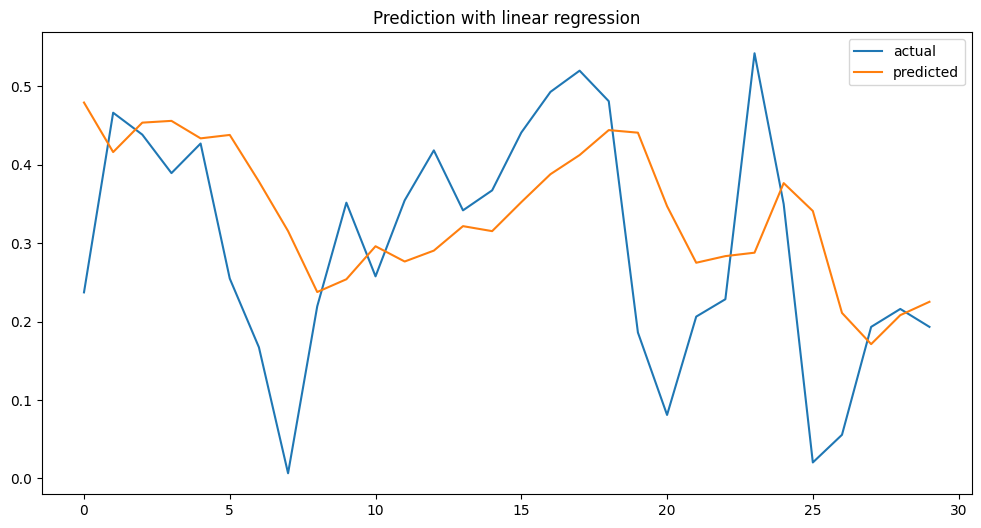

In [55]:
X_test_windowed, y_test_windowed = hf.prepare_windowed_data(test_data[["production", "radiation"]], WINDOW_SIZE)

predictions = model.predict(X_test_windowed)
#print(predictions)

last_month_true = y_test_windowed[-30:]
last_month_pred = predictions[-30:]

rmse = mean_squared_error(y_test_windowed, predictions, squared=False)
print("\n RMSE:", rmse)
print("mean error: ", scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten())

plt.figure(figsize=(12, 6))
plt.title("Prediction with linear regression")
plt.plot(last_month_true, label="actual")
plt.plot(last_month_pred, label="predicted")
plt.legend()
plt.show()

## LSTM with multiple attributes

In [370]:
importlib.reload(hf)
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=5)

# make windowed data needed for LSTM
WINDOW_SIZE = 3
X_train_windowed, y_train_windowed = hf.prepare_windowed_data(train_data[["production", "radiation", "day_sin", "day_cos"]], WINDOW_SIZE)
LEARNING_RATE = 0.001
EPOCHS = 500
ACTIVATION = "sigmoid"
model = hf.build_lstm_model_sincosattr(LEARNING_RATE, ACTIVATION, WINDOW_SIZE)
model.fit(X_train_windowed, y_train_windowed, epochs=EPOCHS, batch_size=16, validation_split=0.2, verbose=1, callbacks=[callback])

Epoch 1/500
185/185 [==============================] - 2s 7ms/step - loss: 0.0800 - val_loss: 0.0469
Epoch 2/500
185/185 [==============================] - 1s 4ms/step - loss: 0.0429 - val_loss: 0.0439
Epoch 3/500
185/185 [==============================] - 1s 5ms/step - loss: 0.0412 - val_loss: 0.0429
Epoch 4/500
185/185 [==============================] - 1s 6ms/step - loss: 0.0406 - val_loss: 0.0421
Epoch 5/500
185/185 [==============================] - 1s 6ms/step - loss: 0.0400 - val_loss: 0.0419
Epoch 6/500
185/185 [==============================] - 1s 6ms/step - loss: 0.0396 - val_loss: 0.0410
Epoch 7/500
185/185 [==============================] - 1s 5ms/step - loss: 0.0389 - val_loss: 0.0405
Epoch 8/500
185/185 [==============================] - 1s 5ms/step - loss: 0.0384 - val_loss: 0.0398
Epoch 9/500
185/185 [==============================] - 1s 5ms/step - loss: 0.0379 - val_loss: 0.0390
Epoch 10/500
185/185 [==============================] - 1s 5ms/step - loss: 0.0374 - val_lo

21/21 [==============================] - 0s 7ms/step

 RMSE: 0.1972980456111662
mean error:  [1133.72860917]


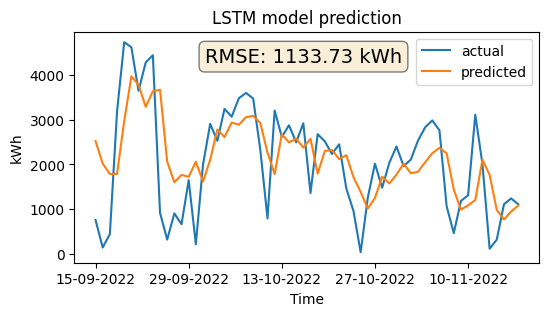

In [376]:
X_test_windowed, y_test_windowed = hf.prepare_windowed_data(test_data[["production", "radiation", "day_sin", "day_cos"]], WINDOW_SIZE)

predictions = model.predict(X_test_windowed)
#print(predictions)

last_month_true = y_test_windowed[-60:]
last_month_pred = predictions[-60:]

last_month_true_scaledback = scaler_prod.inverse_transform(last_month_true.reshape(-1, 1)).flatten()
#last_month_true_scaledback = pd.DataFrame(last_month_true_scaledback, index=last_month_true.index)

last_month_pred_scaledback = scaler_prod.inverse_transform(last_month_pred).flatten()
#last_month_pred_scaledback = pd.DataFrame(last_month_pred_scaledback, index=last_month_pred.index)

rmse = mean_squared_error(y_test_windowed, predictions, squared=False)
print("\n RMSE:", rmse)
mean_error = scaler_prod.inverse_transform(rmse.reshape(-1, 1)).flatten()
print("mean error: ", mean_error)

plt.figure(figsize=(6, 3))
plt.title("LSTM model prediction")
plt.plot(last_month_true_scaledback, label="actual")
plt.plot(last_month_pred_scaledback, label="predicted")
plt.legend()

# change y axis to date from 2022-09-15 to 2022-11-15 using pandas date_range and set_xticks to 5 to show every 5th day and show only date
plt.xticks(np.arange(0, 60, 13), pd.date_range("2022-09-15", "2022-11-15", freq="14D").strftime("%d-%m-%Y"))

plt.xlabel("Time")
plt.ylabel("kWh")

plt.text(0.3, -0.35, "RMSE: " + str(round(float(mean_error), 2)) + " kWh", transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.savefig("img/LSTM_model.png", bbox_inches='tight')
plt.show()